# Performance comparison of Neural network and Random Forest over Academic dataset

### Importing the libraries

In [663]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

### Importing the data and preprocessing

In [664]:
df=pd.read_excel('PredictData.xlsx')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [671]:
#Setting the Numerical values for Target Class
Code_target = {"Target": {"Dropout": 0,  "Graduate": 1,"Enrolled": 2}}
df = df.replace(Code_target)

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [666]:
#Checking the Nan Values

df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mothers qualification                             0
Fathers qualification                             0
Mothers occupation                                0
Fathers occupation                                0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [667]:
#Checking for duplicate values

duplicates = df.duplicated()
df[duplicates].loc[:]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


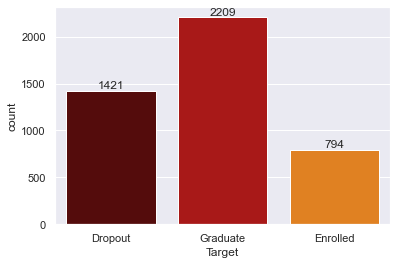

In [675]:
#Visualizing the current data to see the overview of target feature.
Plot= plt.subplot()
sns.set_theme(style="darkgrid")
sns.countplot(x='Target', data =df,palette="gist_heat")
Plot.xaxis.set_ticklabels(['Dropout','Graduate','Enrolled'])

for i in Plot.containers:
    Plot.bar_label(i,)

In [676]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.858273
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.693326
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


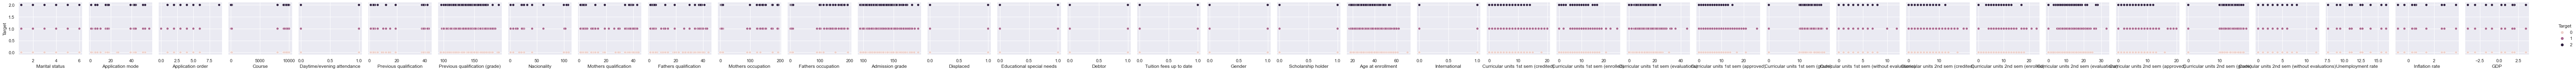

In [682]:
# CHecking the realation of Target feature with respect to each feature in dataset

sns.pairplot(data=df, hue='Target',y_vars='Target')

#"Dropout": 0,  "Graduate": 1,"Enrolled": 2
#Please double click on the plots to see clearly

### Splitting the dataset and training them.

In [684]:
#Preparing the training data and creating 2 data frames. 

X=df[['Marital status','Application mode','Application order','Course','Daytime/evening attendance','Previous qualification','Previous qualification (grade)','Nacionality','Mothers qualification','Fathers qualification','Mothers occupation','Fathers occupation','Admission grade','Displaced','Educational special needs','Debtor','Tuition fees up to date','Gender','Scholarship holder','Age at enrollment','International','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']] 
y=df['Target']
X.head(5)
y.head(5)

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [685]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [686]:
#(X_train, y_train), (X_test, y_test) = pd.read_excel('PredictData.xlsx')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3096, 36), (3096,), (1328, 36), (1328,))

### Creating the Network structure

In [687]:
#Importing tenserflow, keras, Adam optimizer and L2 regularizer

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

In [701]:
opt_1 = Adam(learning_rate=0.001)                                         # Setting the learning rate
model=tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(36,)),
    layers.Flatten(),                                                      # Flattening the input to get 1-D layer
    layers.Dense(50, activation='relu',kernel_regularizer=L2(0.01)),       # Creating the inner layers with hyper parameters- activation and regularizer L2/L1
    #layers.Dropout(0.05),                                                  # setting backpropogation to 0.5
    layers.Dense(50, activation='relu',kernel_regularizer=L2(0.01)),       # activation='tanh' or activation='sigmoid'
    #layers.Dropout(0.05),
    layers.Dense(50, activation='relu',kernel_regularizer=L2(0.01)),
    #layers.Dropout(0.05),
    layers.Dense(50, activation='relu',kernel_regularizer=L2(0.01)),
    
    tf.keras.layers.Dense(3, activation='softmax')])                      # creating the output layer of Neural network
model.summary()                                                            # printing the summary of Layers and params

Model: "sequential_168"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_872 (Dense)           (None, 256)               9472      
                                                                 
 flatten_171 (Flatten)       (None, 256)               0         
                                                                 
 dense_873 (Dense)           (None, 50)                12850     
                                                                 
 dense_874 (Dense)           (None, 50)                2550      
                                                                 
 dense_875 (Dense)           (None, 50)                2550      
                                                                 
 dense_876 (Dense)           (None, 50)                2550      
                                                                 
 dense_877 (Dense)           (None, 3)              

### Compiling and training the model

In [761]:
model.compile(optimizer=opt_1, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [764]:
import time

start_time = time.time()
Performance=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=25) #epochs=10
end_time = time.time()

training_time_NN = end_time - start_time
print('Training time:', training_time_NN, 'seconds')

Epoch 1/25
97/97 [==============================] - 0s 5ms/step - loss: 0.6701 - accuracy: 0.7335 - val_loss: 0.7087 - val_accuracy: 0.7048
Epoch 2/25
97/97 [==============================] - 0s 4ms/step - loss: 0.6683 - accuracy: 0.7303 - val_loss: 0.6770 - val_accuracy: 0.7417
Epoch 3/25
97/97 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.7432 - val_loss: 0.6642 - val_accuracy: 0.7440
Epoch 4/25
97/97 [==============================] - 0s 4ms/step - loss: 0.6369 - accuracy: 0.7481 - val_loss: 0.6622 - val_accuracy: 0.7492
Epoch 5/25
97/97 [==============================] - 0s 5ms/step - loss: 0.6275 - accuracy: 0.7490 - val_loss: 0.6542 - val_accuracy: 0.7477
Epoch 6/25
97/97 [==============================] - 0s 5ms/step - loss: 0.6638 - accuracy: 0.7345 - val_loss: 0.6785 - val_accuracy: 0.7417
Epoch 7/25
97/97 [==============================] - 0s 4ms/step - loss: 0.6289 - accuracy: 0.7458 - val_loss: 0.6715 - val_accuracy: 0.7432
Epoch 8/25
97/97 [==

In [765]:
#Evaluating the model
loss, accuracy_NN = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy_NN)

42/42 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.7252
Test loss: 0.6801204681396484
Test accuracy: 0.7251505851745605


In [766]:
predictions = model.predict(X_test)
print(predictions)

42/42 [==============================] - 0s 2ms/step
[[0.01526708 0.9576062  0.02712675]
 [0.01671443 0.9534406  0.02984493]
 [0.05947106 0.82627296 0.11425597]
 ...
 [0.0375944  0.8921559  0.07024972]
 [0.02535227 0.928327   0.04632068]
 [0.93098277 0.00201926 0.066998  ]]


### Creating the confusion matrix

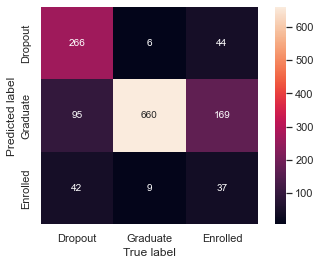

In [767]:
#Creating the confusion matrix to seed the True value and predicted value
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

Plot= plt.subplot()

classes = pd.Series(y_test).unique()

mat = confusion_matrix(y_test, predictions.argmax(axis=1))

#mat = confusion_matrix(y_test,predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=classes, yticklabels=classes)
Plot.xaxis.set_ticklabels(['Dropout','Graduate','Enrolled'])
Plot.yaxis.set_ticklabels(['Dropout','Graduate','Enrolled'])

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.show()

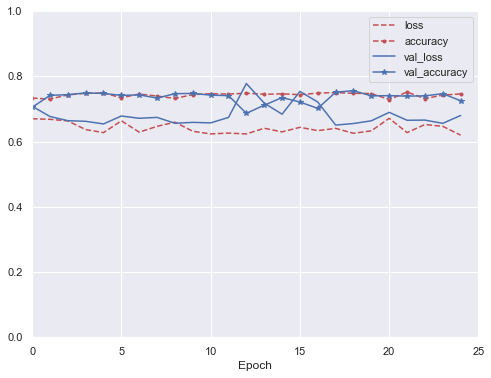

In [769]:
#Calculating The performance of Neural Network structure over 30 Epochs
pd.DataFrame(Performance.history).plot(
    figsize=(8, 6), xlim=[0, 25], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

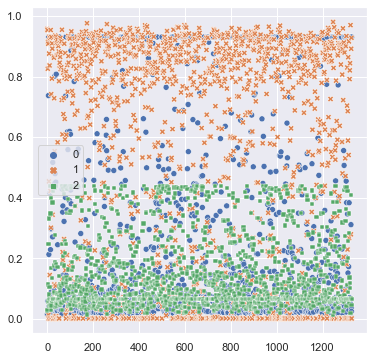

In [770]:
# Plot the training time results using a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(data=predictions)

plt.show()

# Implementing Random forest Classifier

In [771]:
#Importing libaries and modules to be used

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset('iris')
import pandas as pd
import numpy as np


from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_blobs
import pandas as pd

### Preprocessing and Validating data

In [732]:
df1=pd.read_excel('PredictData.xlsx')
df1

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [734]:
Code_target = {"Target": {"Dropout": 0,  "Graduate": 1,"Enrolled": 2}}
df1 = df1.replace(Code_target)

df1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [735]:
df1.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.858273
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.693326
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [736]:
df1.isna().sum() #checking for Nan values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mothers qualification                             0
Fathers qualification                             0
Mothers occupation                                0
Fathers occupation                                0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [737]:
#Checking for duplicate values

duplicates = df1.duplicated()
df1[duplicates].loc[:]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


In [738]:
#datapoints = df1.drop('Target', axis=1).values
#labels = np.array(df1['Target'])

datapoints=df1[['Marital status','Application mode','Application order','Course','Daytime/evening attendance','Previous qualification','Previous qualification (grade)','Nacionality','Mothers qualification','Fathers qualification','Mothers occupation','Fathers occupation','Admission grade','Displaced','Educational special needs','Debtor','Tuition fees up to date','Gender','Scholarship holder','Age at enrollment','International','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']] 
labels=df1['Target']


In [739]:
print(datapoints)
print(labels)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance  Previous qualification  \
0                              1                       1   
1                              1                   

### Spliting the data into training and Test Sets

In [740]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(datapoints, labels, test_size=0.3, random_state=42)

In [741]:
#defining the classifier and using hyperparameters
decisiontree = DecisionTreeClassifier()
randomforest = BaggingClassifier(decisiontree, n_estimators=100, max_samples=0.8, random_state=1) 

# How well would a single decision tree do?
scores_tree = cross_val_score(decisiontree, datapoints, labels, cv=10)
print("Score of Single decision tree classifier: ", scores_tree.mean())
    
# How well does our random forest do?
scores_forest = cross_val_score(randomforest, datapoints, labels, cv=10)
print("Score of Random forest classifiers scored: ", scores_forest.mean())

Score of Single decision tree classifier:  0.6822048353983025
Score of Random forest classifiers scored:  0.7737285885008631


### Implementing the Random forest Classifier

In [742]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,criterion='gini',oob_score=False,bootstrap=True)

classifier.fit(data_train, labels_train)         

predictions_train = classifier.predict(data_train) #passing data to predict the values
predictions_test = classifier.predict(data_test)

#Calculating acuracy
acc_train_RF = accuracy_score(labels_train, predictions_train)
acc_test_RF = accuracy_score(labels_test, predictions_test)


print("Accuracy on training data: ", acc_train_RF)
print("Accuracy on test data: ", acc_test_RF)

Accuracy on training data:  1.0
Accuracy on test data:  0.7740963855421686


#### HyperParameters of Random forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [743]:
import time

#Calculate training time
start = time.time()
randomforest.fit(data_train,labels_train)
stop = time.time()
Training_time_RF=stop - start
print(f"Training time: {Training_time_RF}s")

Training time: 1.025712251663208s


### Generating the confusion matrix 

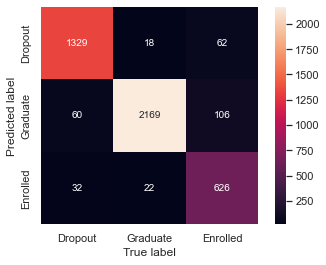

In [747]:
from sklearn.metrics import confusion_matrix

Plot= plt.subplot()
classes = pd.Series(labels).unique()

mat = confusion_matrix(labels, classifier.predict(datapoints))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=classes, yticklabels=classes)
Plot.xaxis.set_ticklabels(['Dropout','Graduate','Enrolled'])
Plot.yaxis.set_ticklabels(['Dropout','Graduate','Enrolled'])

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.show()

## Comparing the performance of Neural Network and Random forest

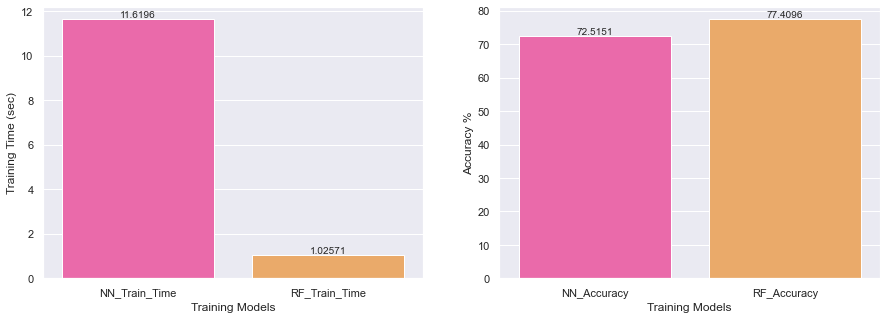

In [772]:
# Plot the training time results using a Bar plot

Time_columns =["NN_Train_Time","RF_Train_Time"]
compare_Time = pd.DataFrame(columns=Time_columns)
compare_Time.loc[0] = [training_time_NN,Training_time_RF]

Accuracy_columns =["NN_Accuracy","RF_Accuracy"]
compare_Accuracy = pd.DataFrame(columns=Accuracy_columns)
compare_Accuracy.loc[0] = [accuracy_NN * 100,acc_test_RF * 100]

#print(compare_Time)
#print(compare_Accuracy)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
T=sns.barplot(data=compare_Time,palette="spring")
for i in T.containers:
    T.bar_label(i,)
plt.xlabel('Training Models')
plt.ylabel('Training Time (sec)')

plt.subplot(1,2,2)
A=sns.barplot(data=compare_Accuracy,palette="spring")
for i in A.containers:
    A.bar_label(i,)
plt.xlabel('Training Models')
plt.ylabel('Accuracy %')

plt.show()

## The End !!